**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np

In [6]:
#Loading data
books = pd.read_csv("/content/drive/My Drive/Colab Notebooks/R5Class/R5L2/books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('/content/drive/My Drive/Colab Notebooks/R5Class/R5L2/users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('/content/drive/My Drive/Colab Notebooks/R5Class/R5L2/ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

### Check no.of records and features given in each dataset

In [7]:
print(books.shape)
# books dataset is having 2,71,360 records and 8 features available

(271360, 8)


In [8]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
users.shape
# users dataset is having 2,78,858 records and 3 features available

(278858, 3)

In [10]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [11]:
users.groupby(['Age']).count()

,userID,Location
Age,,
0.0,416,416
1.0,288,288
2.0,105,105
3.0,45,45
4.0,28,28
5.0,26,26
6.0,18,18
7.0,27,27
8.0,54,54


In [12]:
ratings.shape
# users dataset is having 11,49,780 records and 3 features available

(1149780, 3)

In [13]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Exploring books dataset

In [14]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [0]:
books.drop(['imageUrlS','imageUrlM','imageUrlL'], axis=1, inplace=True)

In [16]:
books.head(15)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner


**yearOfPublication**

### Check unique values of yearOfPublication


In [0]:
books2=books.groupby(['yearOfPublication']).count()

In [18]:
books2

,ISBN,bookTitle,bookAuthor,publisher
yearOfPublication,,,,
0,3570,3570,3570,3570
1806,1,1,1,1
1900,1,1,1,1
1901,7,7,7,7
1902,2,2,2,2
1904,1,1,1,1
1906,1,1,1,1
1908,1,1,1,1
1910,1,1,1,1


As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [19]:
books[books['yearOfPublication']=='DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [20]:
books[books['yearOfPublication']=='Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [0]:
# It seems that for rows where yearOfPublication is 'DK Publishing Inc' and 'Gallimard' the data entered is swapped with bookauthor and yearOfPublication. 
# Since we are not aware of the fact that this assumption is correct or not, so its better to drop those rows and also the no of columns are very less as compared 
# to rest of the dataset

books.drop(books.loc[books['yearOfPublication']=='Gallimard'].index, inplace=True)

In [0]:
books.drop(books.loc[books['yearOfPublication']=='DK Publishing Inc'].index, inplace=True)

In [23]:
books[books['yearOfPublication']=='Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [24]:
books[books['yearOfPublication']=='DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


### Change the datatype of yearOfPublication to 'int'

In [25]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

In [0]:
books['yearOfPublication']=books['yearOfPublication'].astype('int64')

In [27]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int64
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [0]:
books['publisher']=books['publisher'].dropna()

In [29]:
books[books['publisher']==np.nan]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


All the NAN values in publisher column has been deleted

## Exploring Users dataset

In [30]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [31]:
users.dtypes

userID        int64
Location     object
Age         float64
dtype: object

In [0]:
sortedArrAge=users.Age.unique()
sortedArrAge.sort()
# Unique values has arranged in ascending order

In [33]:
sortedArrAge

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 113., 114., 115., 116., 118., 119., 123., 124., 127.,
       128., 132., 133., 136., 137., 138., 140., 141., 143., 146., 147.,
       148., 151., 152., 156., 157., 159., 162., 168., 172., 175., 183.,
       186., 189., 199., 200., 201., 204., 207., 20

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [0]:
#users.replace(users.loc[users['Age']<5 & users['Age']>100].index, np.nan)
users['Age'] = np.where((users['Age'] < 5.0),np.nan,users.Age)

In [0]:
 users['Age'] = np.where((users['Age'] > 100.0),np.nan,users.Age)

In [36]:
sortedArrAge=users.Age.unique()
sortedArrAge.sort()
sortedArrAge

array([  5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
        27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,
        38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
        49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
        60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,
        71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,
        82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,
        93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,  nan])

### Replace null values in column `Age` with mean

In [37]:
users.Age.mean()

34.74663765822785

In [0]:
users['Age'].fillna(users.Age.mean(), inplace = True) 

In [39]:
sortedArrAge=users.Age.unique()
sortedArrAge.sort()
sortedArrAge

array([  5.        ,   6.        ,   7.        ,   8.        ,
         9.        ,  10.        ,  11.        ,  12.        ,
        13.        ,  14.        ,  15.        ,  16.        ,
        17.        ,  18.        ,  19.        ,  20.        ,
        21.        ,  22.        ,  23.        ,  24.        ,
        25.        ,  26.        ,  27.        ,  28.        ,
        29.        ,  30.        ,  31.        ,  32.        ,
        33.        ,  34.        ,  34.74663766,  35.        ,
        36.        ,  37.        ,  38.        ,  39.        ,
        40.        ,  41.        ,  42.        ,  43.        ,
        44.        ,  45.        ,  46.        ,  47.        ,
        48.        ,  49.        ,  50.        ,  51.        ,
        52.        ,  53.        ,  54.        ,  55.        ,
        56.        ,  57.        ,  58.        ,  59.        ,
        60.        ,  61.        ,  62.        ,  63.        ,
        64.        ,  65.        ,  66.        ,  67.  

No NAN values are present now

### Change the datatype of `Age` to `int`

In [0]:
users.Age=users.Age.astype('int64')

In [41]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


## Exploring the Ratings Dataset

### check the shape

In [42]:
ratings.shape

(1149780, 3)

In [0]:
n_users = users.shape[0]
n_books = books.shape[0]

In [44]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [45]:
ratings[ratings['ISBN'].isin(books.ISBN)].count()

userID        1031132
ISBN          1031132
bookRating    1031132
dtype: int64

In [46]:
ratings.shape

(1149780, 3)

In [0]:
ratingsNew=ratings[ratings['ISBN'].isin(books.ISBN)]
#ratings.drop(ratings.loc[ratings['ISBN'].isin(books.ISBN)].index)

In [48]:
ratingsNew.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [49]:
ratingsNew.shape

(1031132, 3)

In [50]:
print(1149780-1031132, ' no of records have been dropped')

118648  no of records have been dropped


### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [51]:
users.dtypes

userID       int64
Location    object
Age          int64
dtype: object

In [0]:
ratingsNew2=ratingsNew[ratingsNew['userID'].isin(users.userID)]

In [53]:
ratingsNew2.shape

(1031132, 3)

In [54]:
383841+647291

1031132

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [0]:
ratingsNew2=ratingsNew2[ratingsNew2['bookRating']!=0]
#383841
#647291

# Lots of rows are having book ratings as Zero

### Find out which rating has been given highest number of times

In [56]:
ratingsNew2.head()

,userID,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [57]:
ratingsNew2.groupby('bookRating').count().sort_values(by='ISBN', ascending=False)

,userID,ISBN
bookRating,,
8,91804,91804
10,71225,71225
7,66401,66401
9,60778,60778
5,45355,45355
6,31687,31687
4,7617,7617
3,5118,5118
2,2375,2375


In [0]:
# Rating 8 has been given maximum times(91,804)

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [0]:
ratingCount = ratingsNew2.userID.value_counts()
ratingsNew3=ratingsNew2[ratingsNew2.userID.isin(ratingCount.index[ratingCount.gt(99)])]

In [60]:
ratingsNew3.groupby('userID').count().sort_values(by='ISBN', ascending=True)

# This dataframe ratingsNew3 is having only those records where users have rated the movie atleast 100 times

,ISBN,bookRating
userID,,
33145,100,100
211919,100,100
26544,100,100
156300,100,100
169682,100,100
36609,100,100
36299,100,100
208406,100,100
95010,100,100


### Generating ratings matrix from explicit ratings


In [0]:
import seaborn as sns

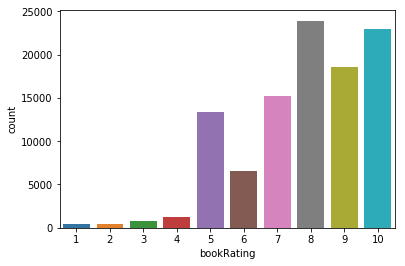

In [62]:
sns.countplot(data=ratingsNew3, x='bookRating')

In [0]:
# The above atrix shows that users have rated majorly on the higher side

In [0]:
ratingsMtx=ratingsNew3.pivot(index='userID', columns='ISBN', values='bookRating')

In [65]:
ratingsMtx.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,0001056107,0001845039,0001935968,0001944711,0001952803,0001953877,0002000547,0002005018,0002005050,0002005557,0002006588,0002115328,0002116286,0002118580,0002154900,0002158973,0002163713,0002176181,0002176432,0002179695,0002181924,0002184974,0002190915,0002197154,0002223929,0002228394,000223257X,0002233509,0002239183,0002240114,...,987960170X,9974643058,999058284X,9992003766,9992059958,9993584185,9994256963,9994348337,9997405137,9997406567,9997406990,999740923X,9997409728,9997411757,9997411870,9997412044,9997412958,9997507002,999750805X,9997508769,9997512952,9997519086,9997555635,9998914140,B00001U0CP,B00005TZWI,B00006CRTE,B00006I4OX,B00007FYKW,B00008RWPV,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
ratingsMtx.shape

(449, 66574)

#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [67]:
users.fillna(0, inplace=True)
books.fillna(0, inplace=True)
ratingsNew3.fillna(0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [0]:
ratingsMtx.fillna(0, inplace=True)

In [69]:
ratingsNew3.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9


### Generate the predicted ratings using SVD with no.of singular values to be 50

In [70]:
!pip install -q surprise

     |████████████████████████████████| 6.5MB 2.6MB/s 


In [0]:
from sklearn.model_selection import train_test_split
from surprise import SVD
from surprise import Reader, Dataset

In [0]:
#trainset, testset = train_test_split(ratingsNew3, test_size=.3)
#trainset = ratingsNew3.build_full_trainset()

In [0]:
reader = Reader(line_format='user item rating', rating_scale=(1, 10))

In [0]:
data = Dataset.load_from_df(ratingsNew3, reader=reader)

In [75]:
data

In [0]:
trainset=data.build_full_trainset()

In [0]:
#testset

In [83]:
algo = SVD(n_factors=50)
algo.fit(trainset)

In [0]:
testset = trainset.build_anti_testset()

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [0]:
userID = 2110

In [0]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

In [0]:
predictions = algo.test(testset)
# I am stuck at this point, even Colab is not able to run this line. It goes out of memory and i dont know what could have been done to improve that.
# Now when i referred the prereads of the course then i got this. Please suggest what should be done

In [0]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(ratingsMtx, k = 50)

In [0]:
sigma = np.diag(sigma)

In [92]:
sigma

array([[147.92121923,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 149.34383594,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 150.07402888, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 379.58353138,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        634.74439146,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 680.41331629]])

In [0]:
all_users_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

In [0]:
preds_df = pd.DataFrame(all_users_predicted_ratings, columns = ratingsMtx.columns)

In [0]:
preds_df

In [105]:
books2.head()

,ISBN,bookTitle,bookAuthor,publisher
yearOfPublication,,,,
0,3570,3570,3570,3570
1806,1,1,1,1
1900,1,1,1,1
1901,7,7,7,7
1902,2,2,2,2


In [0]:
def recommend_books(predictions_df, userID, books2, ratingsMtx, num_recommendations = False):
    user_row_number = userID - 1  #UserID starts at zero not 1
    sorted_user_predictions = predictions_df.loc[user_row_number].sort_values(ascending = False)
    
    user_data = ratingsNew3[ratingsNew3.userID == (userID)]
    user_full = (user_data.merge(books2, how = 'left', left_on = 'ISBN', right_on = 'ISBN').
                sort_values(['bookRating'], ascending = False)
                )
    print('User {0} has already rated {1} book.'.format(userID, user_full.dropna().shape[0]))
    print('Recommending the highest {0} predicted ratings books not already rated.'.format(num_recommendations))
    
    recommendations = (books2[~books2['ISBN'].isin(users['userID'])].
                      merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
                           left_on = 'movieId',
                           right_on = 'movieId').
                      rename(columns = {user_row_number: 'Predictions'}).
                      sort_values('Predictions', ascending = False).
                      iloc[:num_recommendations, :-1])
    return user_full, recommendations, sorted_user_predictions, user_data, user_full

### Get the predicted ratings for userID `2110` and sort them in descending order

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [0]:
user_data.head()

In [0]:
user_data.shape

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [0]:
book_data.shape

In [0]:
book_data.head()

In [0]:
user_full_info.head()

### Get top 10 recommendations for above given userID from the books not already rated by that user